In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Kateri je najpogostejši vzrok smrti za posamezen spol?

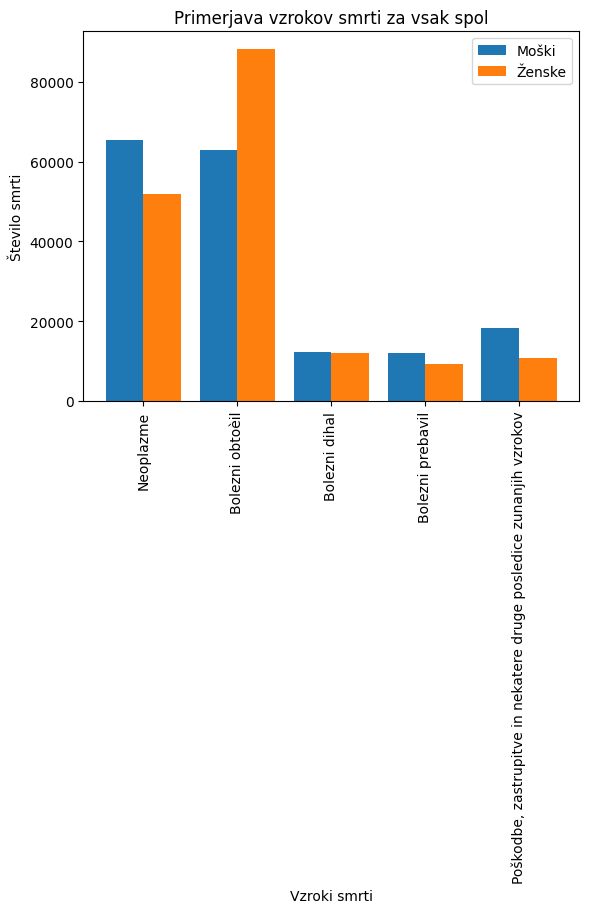

In [2]:
# branje datoteke
df = pd.read_csv('../projekt/podatki-vsi-brez-1000.csv', delimiter=';', skiprows=[0, 1], encoding='windows-1252')
# filtriramo podatke samo za moški in ženski spol ter samo za Slovenijo
moski = df[(df['SPOL'] == 'Moški') & (df['STATISTIÈNA REGIJA'] == 'SLOVENIJA')]
zenske = df[(df['SPOL'] == 'Ženske') & (df['STATISTIÈNA REGIJA'] == 'SLOVENIJA')]

# združimo podatke za vsak vzrok posebej in jih nato združimo po stolpcih posameznega leta
moski_po_vzrokih = {}
zenske_po_vzrokih = {}

# preberemo stolpce in pridobimo letnico in vzrok smrti
for v in range(3,8):
    column = df.columns[v]
    besede = column.split()
    leto_smrti = besede[0]
    vzrok_smrti = ' '.join(besede[3:])
    vzrok_smrti = ' '.join(vzrok_smrti.split()[:-1])

    moski_po_letih = 0
    for c in moski.columns:
        if vzrok_smrti in c:
            moski_po_letih += moski[c]
    moski_po_vzrokih[vzrok_smrti] = moski_po_letih

    zenske_po_letih = 0
    for c in zenske.columns:
        if vzrok_smrti in c:
            zenske_po_letih += zenske[c]
    zenske_po_vzrokih[vzrok_smrti] = zenske_po_letih

# prikažemo porazdelitev vzrokov smrti za vsak spol
X = moski_po_vzrokih
df_moski = pd.DataFrame(moski_po_vzrokih)
df_zenske = pd.DataFrame(zenske_po_vzrokih)
x_axis = np.arange(len(X))

plt.bar(x_axis - 0.2, df_moski.values[0], 0.4, label = 'Moški')
plt.bar(x_axis + 0.2, df_zenske.values[0], 0.4, label = 'Ženske')

plt.xticks(x_axis, X)
plt.xlabel("Vzroki smrti")
plt.ylabel("Število smrti")
plt.title("Primerjava vzrokov smrti za vsak spol")
plt.legend()
plt.xticks(rotation=90)
plt.show()